In [20]:
import warnings 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import re
import json 
import nltk
import spacy
import string
import unicodedata
from bs4 import BeautifulSoup
from textblob import TextBlob 
from nltk.stem import WordNetLemmatizer

from IPython import display 
display.set_matplotlib_formats('svg')
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files
uploaded=files.upload() 

Saving all_kindle_review .csv to all_kindle_review .csv


In [21]:
# load the data 
data = pd.read_csv("all_kindle_review .csv")
data.head()

,Unnamed: 0,Unnamed: 0.1,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600
1,1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400
2,2,9146,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400
3,3,7038,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400
4,4,1776,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000


In [23]:
#we are going to use only 2 columns Independent(reviewText) and Dependent(rating).

# selection columns! 
data = data[['reviewText', 'rating']]
data.head()


,reviewText,rating
0,"Jace Rankin may be short, but he's nothing to ...",3
1,Great short read. I didn't want to put it dow...,5
2,I'll start by saying this is the first of four...,3
3,Aggie is Angela Lansbury who carries pocketboo...,3
4,I did not expect this type of book to be in li...,4


In [24]:
# check the shape
data.shape

(12000, 2)

In [25]:
# check whehter it's having null values or not
data.isnull().sum()

reviewText    0
rating        0
dtype: int64

In [26]:
# check unique categories 
data['rating'].value_counts()

5    3000
4    3000
3    2000
2    2000
1    2000
Name: rating, dtype: int64

In [27]:
# if rating is above 3 we will consider it as 1 else 0.
data["rating"] = data["rating"].apply(lambda x: 1 if x < 3  else 0)

In [28]:
data['rating'].value_counts()

0    8000
1    4000
Name: rating, dtype: int64

In [31]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image  

# get the text based on ratings! 
rating_zero = data['reviewText'][data['rating'] == 0]
rating_one = data['reviewText'][data['rating'] == 1]


# word tokenize the data 
def list_tokenizer(rating): 
    ratings = " ".join(rating)
    ratings = nltk.word_tokenize(ratings)
    return str(ratings)

# visualizer 
def word_cloud(rating, number): 
    wc = WordCloud(background_color = 'black', max_font_size = 50, max_words = 100)  
    wc.generate(rating)  
    plt.figure(figsize=(10,8))
    plt.imshow(wc, interpolation = 'bilinear')  
    plt.title(f'WordCloud for {number}')
    plt.axis('off');

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


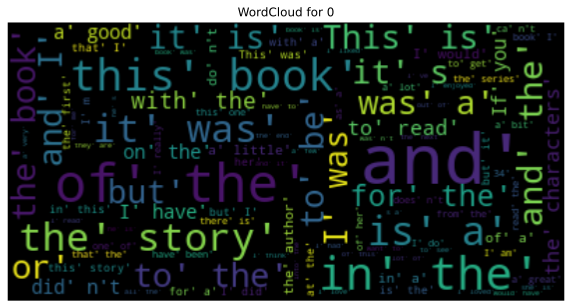

In [38]:
#visuailze the ratings
nltk.download('punkt')
word_cloud(list_tokenizer(rating_zero), 0)

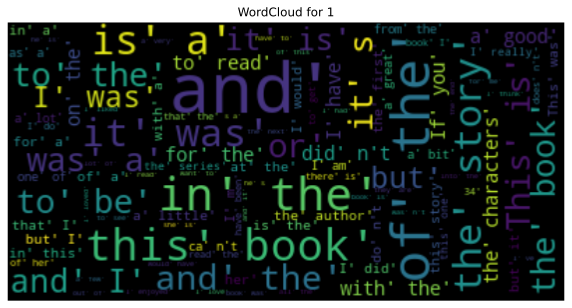

In [39]:
word_cloud(list_tokenizer(rating_zero), 1)

In [40]:
#Pre-processing
#lowering case 
data['reviewText'] = data['reviewText'].str.lower()
data.head()

,reviewText,rating
0,"jace rankin may be short, but he's nothing to ...",0
1,great short read. i didn't want to put it dow...,0
2,i'll start by saying this is the first of four...,0
3,aggie is angela lansbury who carries pocketboo...,0
4,i did not expect this type of book to be in li...,0


In [41]:
#remove punctuation 
data['reviewText'] = data['reviewText'].apply(lambda x: re.sub('[^a-z A-Z 0-9-]+', '', x))  # it removes the punctuation 
data.head()

,reviewText,rating
0,jace rankin may be short but hes nothing to me...,0
1,great short read i didnt want to put it down ...,0
2,ill start by saying this is the first of four ...,0
3,aggie is angela lansbury who carries pocketboo...,0
4,i did not expect this type of book to be in li...,0


In [42]:
#remove stopwords
from spacy.lang.en.stop_words import STOP_WORDS
data['reviewText'] = data['reviewText'].apply(lambda x: " ".join([i for i in x.split() if i not in STOP_WORDS]) )
data.head()

,reviewText,rating
0,jace rankin short hes mess man hauled saloon u...,0
1,great short read didnt want read sitting sex s...,0
2,ill start saying books wasnt expecting 34concl...,0
3,aggie angela lansbury carries pocketbooks inst...,0
4,expect type book library pleased find price right,0


In [43]:
#remove url and tags 
data['reviewText'] = data['reviewText'].apply(lambda x: re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , str(x)))
data.head()

,reviewText,rating
0,jace rankin short hes mess man hauled saloon u...,0
1,great short read didnt want read sitting sex s...,0
2,ill start saying books wasnt expecting 34concl...,0
3,aggie angela lansbury carries pocketbooks inst...,0
4,expect type book library pleased find price right,0


In [44]:
#remove html tags 
data['reviewText'] = data['reviewText'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text())
data.head()

,reviewText,rating
0,jace rankin short hes mess man hauled saloon u...,0
1,great short read didnt want read sitting sex s...,0
2,ill start saying books wasnt expecting 34concl...,0
3,aggie angela lansbury carries pocketbooks inst...,0
4,expect type book library pleased find price right,0


In [45]:
#remove emails 
data['reviewText'] = data['reviewText'].apply(lambda x: re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+\b)', '', x)) 

In [46]:
#remove extra spaces
data['reviewText'] = data['reviewText'].apply(lambda x: " ".join(x.split()))
data.head()

,reviewText,rating
0,jace rankin short hes mess man hauled saloon u...,0
1,great short read didnt want read sitting sex s...,0
2,ill start saying books wasnt expecting 34concl...,0
3,aggie angela lansbury carries pocketbooks inst...,0
4,expect type book library pleased find price right,0


In [50]:
#lemmatizer 
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
%time
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

data["reviewText"] = data["reviewText"].apply(lambda text: lemmatize_words(text))
data.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 8.11 µs


,reviewText,rating
0,jace rankin short he mess man hauled saloon un...,0
1,great short read didnt want read sitting sex s...,0
2,ill start saying book wasnt expecting 34conclu...,0
3,aggie angela lansbury carry pocketbook instead...,0
4,expect type book library pleased find price right,0


In [51]:
# data split 
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(data['reviewText'], data['rating'], test_size = 0.3)

In [52]:
# Convert text to numbers using (BOW)! 
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

# let's convert 
xtrain_bow = vectorizer.fit_transform(xtrain).toarray()
xtest_bow = vectorizer.transform(xtest).toarray()

In [53]:
# Convert text to numbers using (TF-IDF)
from sklearn.feature_extraction.text import TfidfVectorizer  

tf_vectorizer = TfidfVectorizer()

# let's convert 
xtrain_tf = tf_vectorizer.fit_transform(xtrain).toarray()
xtest_tf = tf_vectorizer.transform(xtest).toarray()

In [54]:
from sklearn.naive_bayes import GaussianNB

# USING BOW 
clf_bow = GaussianNB().fit(xtrain_bow, ytrain) 
prediction_bow = clf_bow.predict(xtest_bow) 

# USINGN TFIDF 
clf_tf = GaussianNB().fit(xtrain_tf, ytrain)
prediction_tf = clf_tf.predict(xtest_tf)

In [58]:
# let's check our model! 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

def metrics(prediction, actual): 
    print('Confusion_matrix \n', confusion_matrix(actual, prediction))
    print('\nAccuracy:', accuracy_score(actual, prediction))
    print('\nclassification_report\n')
    print(classification_report(actual, prediction))
    
    


In [59]:
metrics(prediction_bow, ytest)

Confusion_matrix 
 [[1318 1047]
 [ 408  827]]

Accuracy: 0.5958333333333333

classification_report

              precision    recall  f1-score   support

           0       0.76      0.56      0.64      2365
           1       0.44      0.67      0.53      1235

    accuracy                           0.60      3600
   macro avg       0.60      0.61      0.59      3600
weighted avg       0.65      0.60      0.61      3600



In [60]:
metrics(prediction_tf, ytest)

Confusion_matrix 
 [[1338 1027]
 [ 426  809]]

Accuracy: 0.5963888888888889

classification_report

              precision    recall  f1-score   support

           0       0.76      0.57      0.65      2365
           1       0.44      0.66      0.53      1235

    accuracy                           0.60      3600
   macro avg       0.60      0.61      0.59      3600
weighted avg       0.65      0.60      0.61      3600



we get 60% accuracyfor both BOW as well as TFIDF Classifier. 